In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_train=zipfile.ZipFile('/content/drive/MyDrive/archive.zip','r')
zip_train.extractall('/tmp')
zip_train.close()

#Image Processing

##Import ImageDataGenerator Library and configure it

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
x_train = train_datagen.flow_from_directory('/tmp',target_size = (64,64),batch_size = 10, class_mode = 'binary')
x_test =  test_datagen.flow_from_directory('/tmp',target_size = (64,64),batch_size = 10, class_mode = 'binary')

Found 555048 images belonging to 286 classes.
Found 555048 images belonging to 286 classes.


#Model Building

##Import the required model building libraries

# New Section

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen =ImageDataGenerator(rescale = 1)

In [ ]:
print(x_train.class_indices)

{'10253': 0, '10254': 1, '10255': 2, '10256': 3, '10257': 4, '10258': 5, '10259': 6, '10260': 7, '10261': 8, '10262': 9, '10264': 10, '10268': 11, '10269': 12, '10272': 13, '10273': 14, '10274': 15, '10275': 16, '10276': 17, '10277': 18, '10278': 19, '10279': 20, '10282': 21, '10285': 22, '10286': 23, '10288': 24, '10290': 25, '10291': 26, '10292': 27, '10293': 28, '10295': 29, '10299': 30, '10300': 31, '10301': 32, '10302': 33, '10303': 34, '10304': 35, '10305': 36, '10306': 37, '10307': 38, '10308': 39, '12241': 40, '12242': 41, '12626': 42, '12748': 43, '12749': 44, '12750': 45, '12751': 46, '12752': 47, '12810': 48, '12811': 49, '12817': 50, '12818': 51, '12819': 52, '12820': 53, '12821': 54, '12822': 55, '12823': 56, '12824': 57, '12826': 58, '12867': 59, '12868': 60, '12869': 61, '12870': 62, '12871': 63, '12872': 64, '12873': 65, '12875': 66, '12876': 67, '12877': 68, '12878': 69, '12879': 70, '12880': 71, '12881': 72, '12882': 73, '12883': 74, '12884': 75, '12886': 76, '12890':

##Initialize the Model

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size =(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))

In [ ]:
model.add(Dense(kernel_initializer='uniform',activation='sigmoid',units=1))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.fit_generator(x_train,steps_per_epoch = 5,epochs = 10, validation_data= x_test,validation_steps = 40)

Epoch 1/10


<ipython-input-55-8732b65084ff>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch = 5,epochs = 10, validation_data= x_test,validation_steps = 40)


ValueError: ignored

In [ ]:
model.save("breastcancer.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


In [ ]:
model=load_model("breastcancer.h5")

In [ ]:
img = image.load_img('/tmp/10253/0/10253_idx5_x1001_y1001_class0.png',target_size=(64,64))

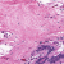

In [ ]:
img

In [ ]:
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 139ms/step


In [ ]:
pred

array([[[[  0.      ,   0.      ,  26.667156, ...,   0.      ,
           85.14602 ,   0.      ],
         [  0.      ,   0.      ,  28.41761 , ...,   0.      ,
           78.3771  ,   0.      ],
         [  0.      ,   0.      ,  34.363926, ...,   0.      ,
           89.6205  ,   0.      ],
         ...,
         [  0.      ,   0.      ,  44.308167, ...,   0.      ,
           94.30684 ,   0.      ],
         [  0.      ,   0.      ,  44.153706, ...,   0.      ,
           95.48898 ,   0.      ],
         [  0.      ,   0.      ,  50.28836 , ...,   0.      ,
           92.98742 ,   0.      ]],

        [[  0.      ,   0.      ,  28.8201  , ...,   0.      ,
           84.20139 ,   0.      ],
         [  0.      ,   0.      ,  27.652529, ...,   0.      ,
           82.31117 ,   0.      ],
         [  0.      ,   0.      ,  32.75731 , ...,   0.      ,
           76.31325 ,   0.      ],
         ...,
         [  0.      ,   0.      ,  52.75552 , ...,   0.      ,
           98.71226 ,   0